In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Salary_Data.csv']


In [8]:
df = pd.read_csv("../input/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Predict Salary of new staff based on experiece

Visualizing the experience

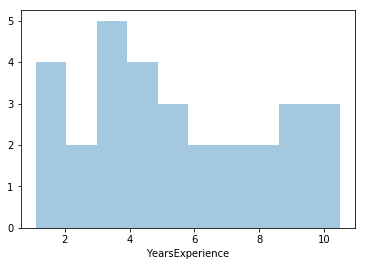

In [14]:
sns.distplot(df['YearsExperience'], kde = False, bins =10)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


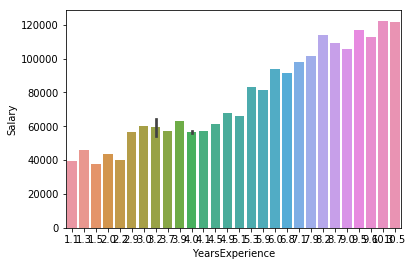

In [15]:
sns.barplot(x='YearsExperience', y = 'Salary', data = df)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


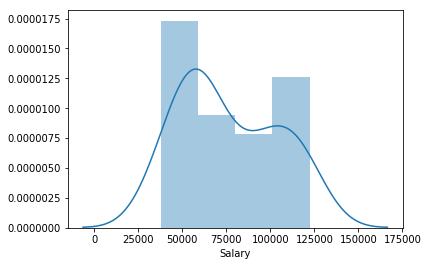

In [16]:
sns.distplot(df['Salary']) #flow of salary

split data into train and test set

In [39]:
x=df.iloc[:, :-1].values
y=df.iloc[:, 1].values

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=1/3, random_state=0)

# Model1 Linear regression

In [52]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [53]:
lr.fit(x_train, y_train)
lr_pred=lr.predict(x_test)
lr_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

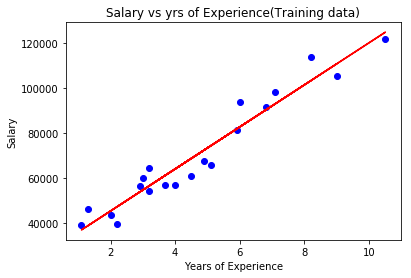

In [54]:
plt.scatter(x_train, y_train,color='blue')
plt.plot(x_train, lr.predict(x_train), color='red')
plt.title('Salary vs yrs of Experience(Training data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

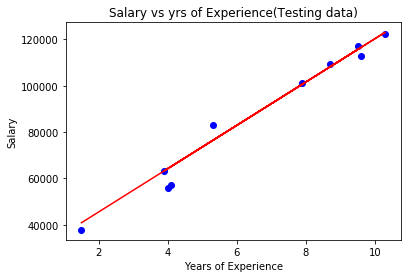

In [55]:
plt.scatter(x_test, y_test,color='blue')
plt.plot(x_test, lr.predict(x_test), color='red')
plt.title('Salary vs yrs of Experience(Testing data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Importing other models

In [56]:
#Knn Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_pred

array([39343., 98273., 56957., 56957., 98273., 98273., 98273., 56957.,
       66029., 91738.])

In [58]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_pred

array([ 41819.8       , 117002.        ,  58078.3       ,  57062.33333333,
       112115.        , 109697.        , 112115.        ,  57062.33333333,
        66410.8       , 109150.3       ])

In [65]:
#Accuracy for models
from sklearn.metrics import r2_score

print('KNN Score: {}'.format(r2_score(y_test, knn_pred)))
print('Random Forest Score: {}'.format(r2_score(y_test, rf_pred)))
print('Linear Reg Score: {}'.format(r2_score(y_test, lr_pred)))

KNN Score: 0.7986614519044186
Random Forest Score: 0.9463279669274167
Linear Reg Score: 0.9749154407708353


In [66]:
#predicting salary for 0 years Exp
train_set = df['YearsExperience']
train_labels = df['Salary']

In [68]:
print("Coefficients: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Coefficients:  [9345.94244312]
Intercept:  26816.19224403119
